# Data Analysis

## Install packages

In [4]:
!pip install wordcloud
!pip install -U textblob
!python -m textblob.download_corpora
!pip install gensim
!pip install scipy

Requirement already up-to-date: textblob in c:\users\ngoc\anaconda3\lib\site-packages (0.15.3)
Finished.
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Ngoc\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ngoc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ngoc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Ngoc\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\Ngoc\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:

## Install libraries

In [5]:
import numpy as np
import pandas as pd

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
from textblob import TextBlob 


Bad key "text.kerning_factor" on line 4 in
C:\Users\Ngoc\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [6]:
df= pd.read_excel(r"all.xlsx")

In [7]:
df.head()

Unnamed: 0                                           hashtags  retweets  \
0           1                                                 []         0   
1           6  ['corona', 'LifePositiveCoronaNegative', 'Memes']         0   
2           7                                                 []         0   
3           8                                                 []         0   
4          10                                                 []         0   

      screen_name                                               text  \
0      Bellatigoh  guess what? thanks to covid-19 most undevelope...   
1  ankita_kapooor  regular course ke liye enroll kiya tha, distan...   
2        EHeyting  have been trying to protect the fun in our las...   
3         pg_1112  bas mat pucho.... mera haal️\ni am only workin...   
4      RElrowaily  so the online transition  coz of corona pandem...   

            timestamp  timestamp_epochs       username  \
0 2020-06-10 14:11:38        1591798298   FreeSpirited   
1 2020-05-28 06:54:55        1590648895  Ankita kapoor   
2 2020-05-28 06:08:21        1590646101  Ellen Heyting   
3 2020-05-27 20:37:21        1590611841             PG   
4 2020-05-26 14:57:52        1590505072  Dr. ruwaishid   

                 location                                       clean_tweets  \
0    some where in africa  guess what? thanks covid-19 undeveloped countr...   
1        allahabad, india  regular course ke liye enroll kiya tha, distan...   
2       helsinki, finland  trying protect fun last week school g11s dista...   
3                     usa  bas mat pucho.... mera haal️ working working.....   
4  كاتب في  @uniworldnews  online transition coz corona pandemic consider...   

         clean_location  
0  some where in africa  
1       allahabad india  
2      helsinki finland  
3                   usa  
4          uniworldnews

In [8]:
df.columns

Index(['Unnamed: 0', 'hashtags', 'retweets', 'screen_name', 'text',
       'timestamp', 'timestamp_epochs', 'username', 'location', 'clean_tweets',
       'clean_location'],
      dtype='object')

In [9]:
df= df.drop(['Unnamed: 0','retweets', 'screen_name','timestamp_epochs', 'username', 'location'], axis=1)

In [10]:
def getSubjectivity(text):
    return TextBlob( str(text)).sentiment.subjectivity

def getPolarity(text):
    return TextBlob( str(text)).sentiment.polarity

In [11]:
df.dropna(subset=['clean_tweets'], inplace = True)
df.reset_index(drop=True, inplace=True)

In [12]:
df['Subjectivity'] = df['clean_tweets'].apply(getSubjectivity)
df['Polarity'] = df['clean_tweets'].apply(getPolarity)

In [13]:
df.head()

hashtags  \
0                                                 []   
1  ['corona', 'LifePositiveCoronaNegative', 'Memes']   
2                                                 []   
3                                                 []   
4                                                 []   

                                                text           timestamp  \
0  guess what? thanks to covid-19 most undevelope... 2020-06-10 14:11:38   
1  regular course ke liye enroll kiya tha, distan... 2020-05-28 06:54:55   
2  have been trying to protect the fun in our las... 2020-05-28 06:08:21   
3  bas mat pucho.... mera haal️\ni am only workin... 2020-05-27 20:37:21   
4  so the online transition  coz of corona pandem... 2020-05-26 14:57:52   

                                        clean_tweets        clean_location  \
0  guess what? thanks covid-19 undeveloped countr...  some where in africa   
1  regular course ke liye enroll kiya tha, distan...       allahabad india   
2  trying protect fun last week school g11s dista...      helsinki finland   
3  bas mat pucho.... mera haal️ working working.....                   usa   
4  online transition coz corona pandemic consider...          uniworldnews   

   Subjectivity  Polarity  
0      0.500000  0.400000  
1      0.538462 -0.125000  
2      0.355303  0.009091  
3      0.366071 -0.169643  
4      0.000000  0.000000

## Word Cloud

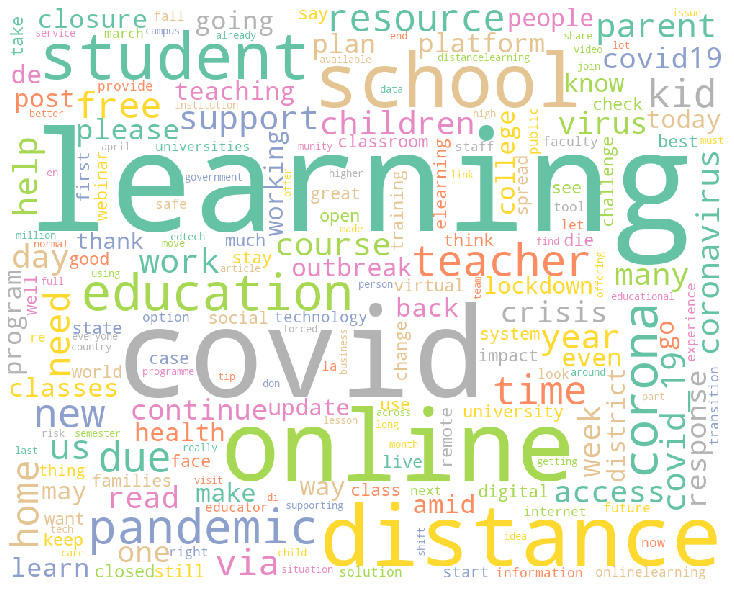

In [22]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.clean_tweets: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1000, height = 800, 
                background_color='white', colormap='Set2', 
                collocations=False, 
                stopwords = stopwords, 
                min_font_size = 12).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

## Sentiment Analysis

In [15]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def get_Polarity_Analysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'

def get_Subjectivity_Analysis(score):
    if score >  0:
      return 'Opinion'
    else:
      return 'Fact'

df['Analysis_Polarity'] = df['Polarity'].apply(get_Polarity_Analysis)

df['Analysis_Subjectivity'] = df['Subjectivity'].apply(get_Subjectivity_Analysis)

# Show the dataframe
df.head()

hashtags  \
0                                                 []   
1  ['corona', 'LifePositiveCoronaNegative', 'Memes']   
2                                                 []   
3                                                 []   
4                                                 []   

                                                text           timestamp  \
0  guess what? thanks to covid-19 most undevelope... 2020-06-10 14:11:38   
1  regular course ke liye enroll kiya tha, distan... 2020-05-28 06:54:55   
2  have been trying to protect the fun in our las... 2020-05-28 06:08:21   
3  bas mat pucho.... mera haal️\ni am only workin... 2020-05-27 20:37:21   
4  so the online transition  coz of corona pandem... 2020-05-26 14:57:52   

                                        clean_tweets        clean_location  \
0  guess what? thanks covid-19 undeveloped countr...  some where in africa   
1  regular course ke liye enroll kiya tha, distan...       allahabad india   
2  trying protect fun last week school g11s dista...      helsinki finland   
3  bas mat pucho.... mera haal️ working working.....                   usa   
4  online transition coz corona pandemic consider...          uniworldnews   

   Subjectivity  Polarity Analysis_Polarity Analysis_Subjectivity  
0      0.500000  0.400000          Positive               Opinion  
1      0.538462 -0.125000          Negative               Opinion  
2      0.355303  0.009091          Positive               Opinion  
3      0.366071 -0.169643          Negative               Opinion  
4      0.000000  0.000000           Neutral                  Fact

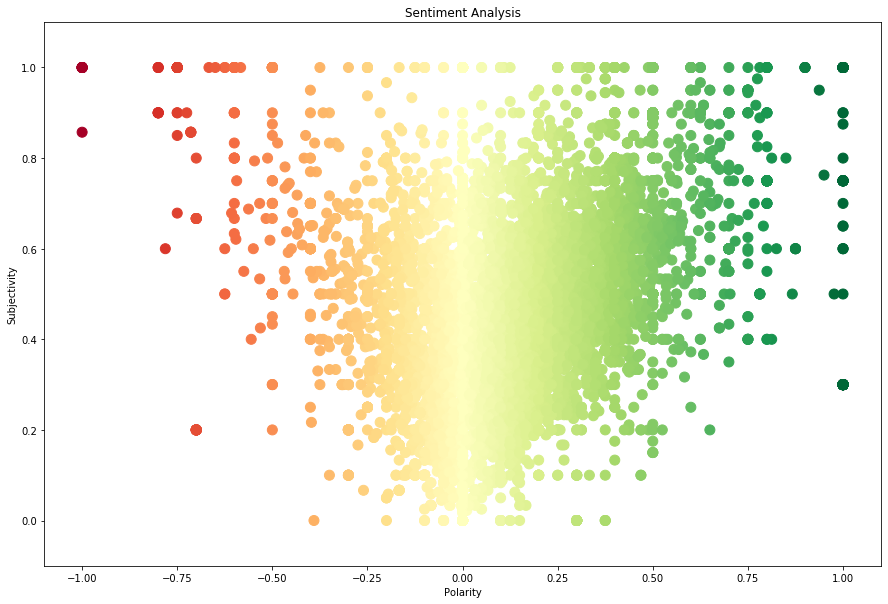

In [16]:
plt.figure(figsize=(15,10)) 

# plt.style.use('seaborn-pastel')

plt.scatter(df['Polarity'], df['Subjectivity'], c=df['Polarity'], s=100, cmap='RdYlGn') 

plt.xlim(-1.1, 1.1)
plt.ylim(-0.1, 1.1) 
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

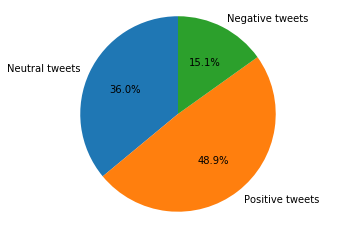

In [17]:
positive_polarity = [p for p in df['Polarity'] if p>0]
negative_polarity = [n for n in df['Polarity'] if n<0]
neutral_polarity = [r for r in df['Polarity'] if r==0]

total_size = len(positive_polarity) + len(negative_polarity) + len(neutral_polarity)
n_size = len(negative_polarity)/total_size
p_size = len(positive_polarity)/total_size
r_size = len(neutral_polarity)/total_size

labels = ['Neutral tweets', 'Positive tweets', 'Negative tweets']
sizes = [r_size, p_size, n_size]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
	        shadow=False, startangle=90)
ax1.axis('equal')
plt.show()

In [18]:
# Show the value counts
df['Analysis_Polarity'].value_counts()

Positive    6683
Neutral     4925
Negative    2068
Name: Analysis_Polarity, dtype: int64

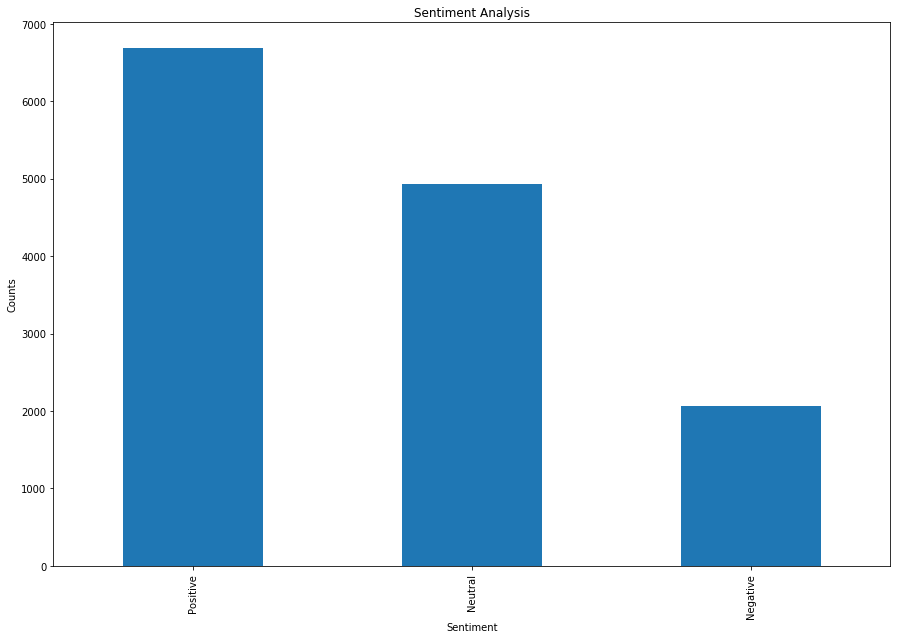

In [19]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis_Polarity'].value_counts().plot(kind = 'bar')
plt.show()

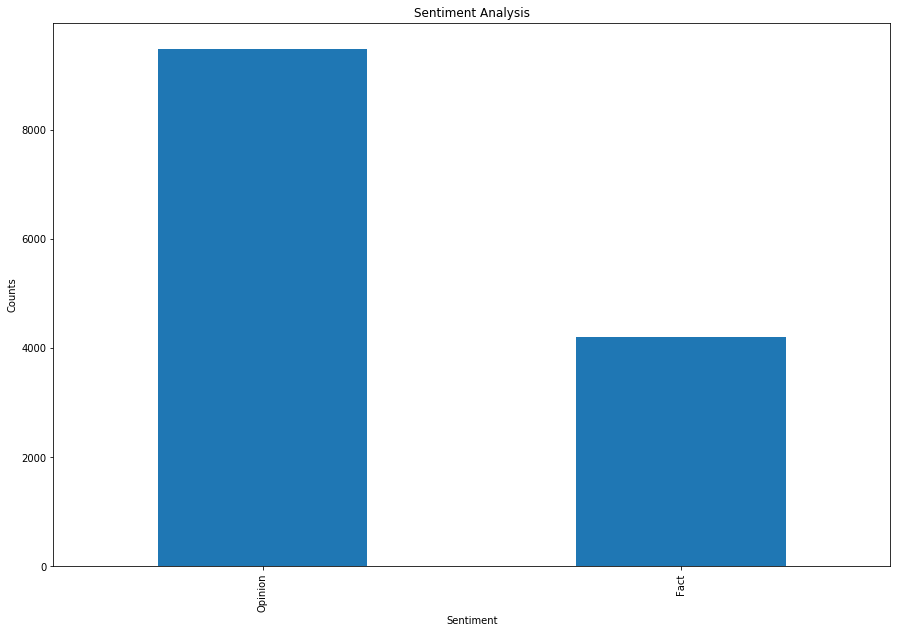

In [20]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis_Subjectivity'].value_counts().plot(kind = 'bar')
plt.show()

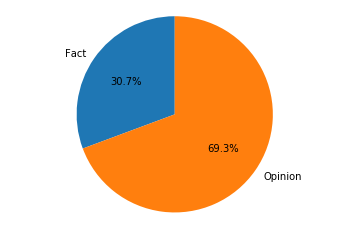

In [21]:

fact_subjectivity = [f for f in df['Subjectivity'] if f==0]
opinion_subjectivity = [o for o in df['Subjectivity'] if o>0]

total_size = len(fact_subjectivity) + len(opinion_subjectivity)
f_size = len(fact_subjectivity)/total_size
o_size = len(opinion_subjectivity)/total_size

labels = ['Fact', 'Opinion']
sizes = [f_size,o_size]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
	        shadow=False, startangle=90)
ax1.axis('equal')
plt.show()

## Topic Modelling

In [23]:
import pyLDAvis
import pyLDAvis.gensim
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation


c:\Users\Ngoc\.vscode\extensions\ms-python.python-2020.8.105045\pythonFiles\lib\python\past\types\oldstr.py:36: DeprecationWarning: invalid escape sequence \d
  """


In [24]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(df['clean_tweets'].values.astype('U'))
print(dtm_tf.shape)

(13676, 2685)


In [25]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(df['clean_tweets'].values.astype('U'))
print(dtm_tfidf.shape)

(13676, 2685)


In [26]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components =8, random_state=50)
lda_tf.fit(dtm_tf)
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components =8, random_state=50)
lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=8, n_jobs=None,
                          perp_tol=0.1, random_state=50, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [24]:
# for i,topic in enumerate(lda_tf.components_):
#     print([tfidf_vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
#     print('\n')

In [27]:
for i,topic in enumerate(lda_tf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vectorizer.get_feature_names()[i] for i in topic.argsort()[-30:]])
    print('\n')


Top 10 words for topic #0:
['countries', 'amid', 'people', 'educational', 'world', 'new', 'schooling', 'corona', 'needs', 'working', 'lockdown', 'digital', 'support', 'need', 'work', 'school', 'provide', 'families', 'parents', 'education', 'crisis', 'pandemic', 'home', 'internet', 'access', 'schools', 'children', 'students', 'online', 'distance']


Top 10 words for topic #1:
['check', 'government', 'details', 'platform', 'virtual', 'free', 'response', 'education', 'access', 'course', 'wake', 'courses', 'training', 'support', 'autodeskambassador', 'ambassadorhub', 'makeanything', 'autodeskedu', 'available', 'mitted', 'new', 'supporting', 'faculty', 'pandemic', 'university', 'read', 'distance', 'resources', 'students', 'online']


Top 10 words for topic #2:
['help', 'adobe', 'register', 'der', 'programme', 'teachers', 'learn', 'information', 'pandemic', 'health', 'response', 'und', 'kill', 'join', 'education', 'schools', 'support', 'coronavirus', 'access', 'webinar', 'students', 'online'

In [26]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.042513  0.220424       1        1  24.444535
6      0.097228  0.078686       2        1  15.271298
4      0.054329 -0.114385       3        1  14.864359
0      0.073845  0.104306       4        1  11.488506
2      0.034647  0.003120       5        1  10.664882
7      0.041273 -0.099364       6        1   9.507933
1      0.067687 -0.195849       7        1   9.078637
5     -0.411523  0.003062       8        1   4.679849, topic_info=     Category         Freq       Term        Total  loglift  logprob
1587  Default  6904.000000     online  6904.000000  30.0000  30.0000
629   Default  4794.000000   distance  4794.000000  29.0000  29.0000
453   Default  1497.000000     corona  1497.000000  28.0000  28.0000
2259  Default  2445.000000   students  2445.000000  27.0000  27.0000
1962  Default   726.000000  resources   726.000000  26.0000  26.0000
...       ...          ...        ...          ...      ...      ...
1587   Topic8   275.653018     online  6904.947962  -0.1589  -3.2142
930    Topic8    50.439372       gets    87.848522   2.5071  -4.9126
2563   Topic8    73.984553      virus   488.313533   1.1748  -4.5295
1488   Topic8    45.318949     moment    86.803157   2.4120  -5.0197
1962   Topic8    48.100500  resources   726.854119   0.3465  -4.9601

[573 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
10        3  0.976337  accelerated
13        2  0.033282       access
13        4  0.483571       access
13        5  0.283878       access
13        6  0.019578       access
...     ...       ...          ...
2673      2  0.027979        young
2673      3  0.041968        young
2673      4  0.685480        young
2676      5  0.975100      youtube
2681      6  0.927654          zit

[1167 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 7, 5, 1, 3, 8, 2, 6])

In [21]:
# # for TF DTM
# lda_tf = LatentDirichletAllocation(n_components =6, random_state=42)
# lda_tf.fit(dtm_tf)
# # for TFIDF DTM
# lda_tfidf = LatentDirichletAllocation(n_components =6, random_state=42)
# lda_tfidf.fit(dtm_tfidf)

In [22]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.072390  0.199524       1        1  36.442028
2     -0.109987 -0.099768       2        1  33.460976
1     -0.106125 -0.081723       3        1  18.748883
0      0.288502 -0.018033       4        1  11.348113, topic_info=     Category         Freq         Term        Total  loglift  logprob
453   Default  1535.000000       corona  1535.000000  30.0000  30.0000
629   Default  4867.000000     distance  4867.000000  29.0000  29.0000
2043  Default  2234.000000       school  2234.000000  28.0000  28.0000
2563  Default   502.000000        virus   502.000000  27.0000  27.0000
1587  Default  6839.000000       online  6839.000000  26.0000  26.0000
...       ...          ...          ...          ...      ...      ...
2259   Topic4   231.897351     students  2448.944546  -0.1810  -4.2729
526    Topic4   106.959642          day   357.671287   0.9690  -5.0467
1538   Topic4    95.981503          new   735.839351   0.1393  -5.1550
2236   Topic4    69.137227         stop   133.657630   1.5169  -5.4831
454    Topic4    68.493945  coronavirus   524.860895   0.1397  -5.4924

[281 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
13        1  0.637918         access
13        2  0.116886         access
13        3  0.245658         access
15        3  0.982723  accessibility
30        2  0.981071       actually
...     ...       ...            ...
2666      4  0.995212           yang
2668      1  0.001774           year
2668      2  0.645883           year
2668      3  0.335362           year
2668      4  0.015970           year

[477 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 1])

In [27]:
topic_values = lda_tf.transform(dtm_tf)
topic_values.shape

(13676, 8)

In [28]:
df['Topic'] = topic_values.argmax(axis=1)

In [29]:
df.head()

hashtags  \
0                                                 []   
1  ['corona', 'LifePositiveCoronaNegative', 'Memes']   
2                                                 []   
3                                                 []   
4                                                 []   

                                                text           timestamp  \
0  guess what? thanks to covid-19 most undevelope... 2020-06-10 14:11:38   
1  regular course ke liye enroll kiya tha, distan... 2020-05-28 06:54:55   
2  have been trying to protect the fun in our las... 2020-05-28 06:08:21   
3  bas mat pucho.... mera haal️\ni am only workin... 2020-05-27 20:37:21   
4  so the online transition  coz of corona pandem... 2020-05-26 14:57:52   

                                        clean_tweets        clean_location  \
0  guess what? thanks covid-19 undeveloped countr...  some where in africa   
1  regular course ke liye enroll kiya tha, distan...       allahabad india   
2  trying protect fun last week school g11s dista...      helsinki finland   
3  bas mat pucho.... mera haal️ working working.....                   usa   
4  online transition coz corona pandemic consider...          uniworldnews   

   Subjectivity  Polarity Analysis_Polarity Analysis_Subjectivity  Topic  
0      0.500000  0.400000          Positive               Opinion      3  
1      0.538462 -0.125000          Negative               Opinion      3  
2      0.355303  0.009091          Positive               Opinion      3  
3      0.366071 -0.169643          Negative               Opinion      3  
4      0.000000  0.000000           Neutral                  Fact      4

In [31]:
df.columns

Index(['hashtags', 'text', 'timestamp', 'clean_tweets', 'clean_location',
       'Subjectivity', 'Polarity', 'Analysis_Polarity',
       'Analysis_Subjectivity', 'Topic'],
      dtype='object')

In [30]:
df_1=df.replace({0:'Learning Support',1:'Covid-19',2:'Schools',3:'Distance Learning',4:'Online Learning',5:'Students',6:'E-learning',7:'Education'})

In [31]:
df_1.head()

hashtags  \
0                                                 []   
1  ['corona', 'LifePositiveCoronaNegative', 'Memes']   
2                                                 []   
3                                                 []   
4                                                 []   

                                                text           timestamp  \
0  guess what? thanks to covid-19 most undevelope... 2020-06-10 14:11:38   
1  regular course ke liye enroll kiya tha, distan... 2020-05-28 06:54:55   
2  have been trying to protect the fun in our las... 2020-05-28 06:08:21   
3  bas mat pucho.... mera haal️\ni am only workin... 2020-05-27 20:37:21   
4  so the online transition  coz of corona pandem... 2020-05-26 14:57:52   

                                        clean_tweets        clean_location  \
0  guess what? thanks covid-19 undeveloped countr...  some where in africa   
1  regular course ke liye enroll kiya tha, distan...       allahabad india   
2  trying protect fun last week school g11s dista...      helsinki finland   
3  bas mat pucho.... mera haal️ working working.....                   usa   
4  online transition coz corona pandemic consider...          uniworldnews   

       Subjectivity          Polarity Analysis_Polarity Analysis_Subjectivity  \
0               0.5               0.4          Positive               Opinion   
1          0.538462            -0.125          Negative               Opinion   
2          0.355303        0.00909091          Positive               Opinion   
3          0.366071         -0.169643          Negative               Opinion   
4  Learning Support  Learning Support           Neutral                  Fact   

               Topic  
0  Distance Learning  
1  Distance Learning  
2  Distance Learning  
3  Distance Learning  
4    Online Learning

<Figure size 2880x1800 with 0 Axes>

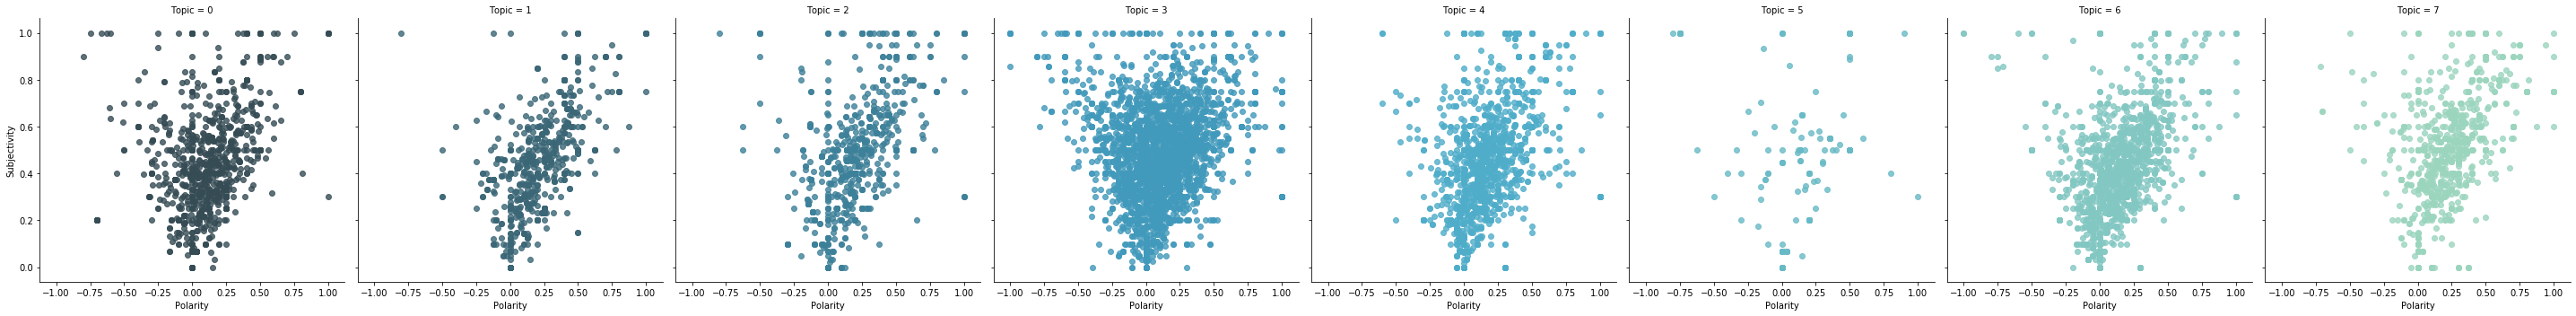

In [32]:
import seaborn as sns


plt.figure(figsize=(40,25)) 

g=sns.lmplot(x="Polarity", y="Subjectivity", hue='Topic', data=df, fit_reg=False, legend=False,palette="GnBu_d", col='Topic', legend_out=True)
 
# # Move the legend to an empty part of the plot
# plt.legend(loc='lower right')
 
plt.show()

In [32]:
df2 = df_1.groupby(['Topic'])['Analysis_Polarity'].value_counts().unstack('Topic').transpose()

df2

Analysis_Polarity  Negative  Neutral  Positive
Topic                                         
Covid-19                 73      443       639
Distance Learning       828      701      1851
E-learning              389      689       973
Education               100      392       766
Learning Support        231      583       649
Online Learning         293      915      1074
Schools                 122      763       633
Students                 32      439        98

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 3 columns):
Negative    8 non-null int64
Neutral     8 non-null int64
Positive    8 non-null int64
dtypes: int64(3)
memory usage: 256.0 bytes


In [31]:
df2['Total'] = df2.sum(axis=1)

In [32]:
df2.columns

Index(['Negative', 'Neutral', 'Positive', 'Total'], dtype='object', name='Analysis_Polarity')

In [33]:
for i in df2:
    df2[i] = round(df2[i]*100/df2.Total)

df2

Analysis_Polarity  Negative  Neutral  Positive  Total
Topic                                                
Covid-19                6.0     38.0      55.0  100.0
Distance Learning      24.0     21.0      55.0  100.0
E-learning             19.0     34.0      47.0  100.0
Education               8.0     31.0      61.0  100.0
Learning Support       16.0     40.0      44.0  100.0
Online Learning        13.0     40.0      47.0  100.0
Schools                 8.0     50.0      42.0  100.0
Students                6.0     77.0      17.0  100.0

In [76]:
df2.to_excel("chart.xlsx")

In [34]:
df2= df2.drop(['Total'], axis=1)

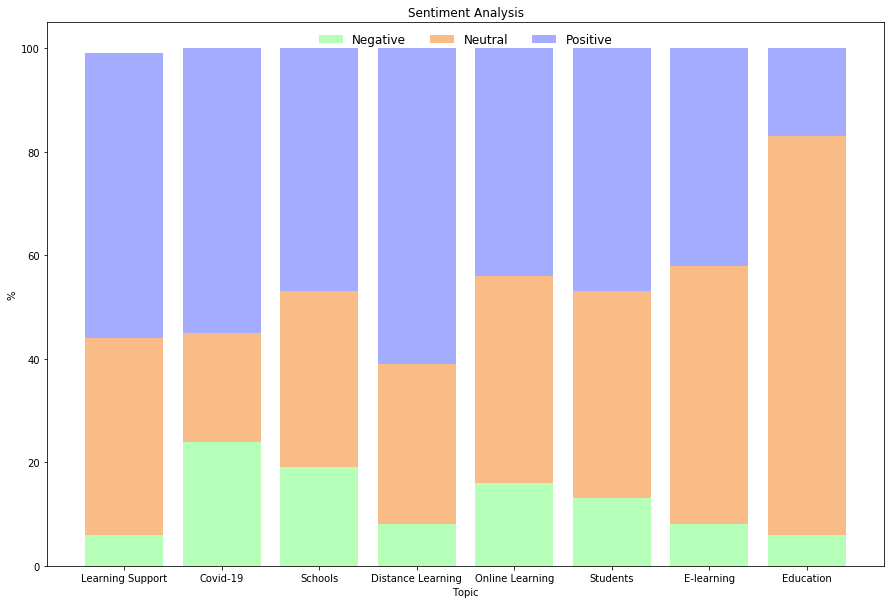

In [35]:
#Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

topic = ['Learning Support','Covid-19','Schools','Distance Learning','Online Learning','Students','E-learning','Education']
sentiment = ['Negative', 'Neutral', 'Positive']
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('%')
p1=plt.bar(topic,df2['Negative'], color='#b5ffb9')
p2=plt.bar(topic,df2['Neutral'], color='#f9bc86', bottom=df2['Negative'])
p3=plt.bar(topic,df2['Positive'], color='#a3acff', bottom=df2['Neutral']+df2['Negative'])
plt.xticks(topic)
plt.xlabel("Topic")
plt.legend((p1[0], p2[0], p3[0]),('Negative', 'Neutral', 'Positive'),fontsize=12, ncol=4, framealpha=0, fancybox=True, loc='upper center')

plt.show()

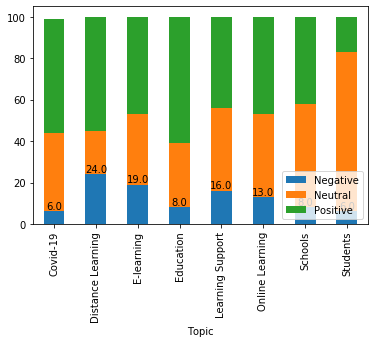

In [66]:

ax = df2.plot(kind='bar',stacked=True)
for rec, label in zip(ax.patches,df2['Negative'].round(1).astype(str)):
    height = rec.get_height()
    ax.text(rec.get_x() + rec.get_width() / 2, height + .05, label,
           ha = 'center', va='bottom')
        
plt.legend(loc='lower right')

In [67]:
labels = []

for i in df2.index:
    label = i
    labels.append(label)

patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center')

In [41]:
df2.columns

Index(['Negative', 'Neutral', 'Positive'], dtype='object', name='Analysis_Polarity')

In [44]:
df=df.replace({0:'Learning Support',1:'Covid-19',2:'Schools',3:'Distance Learning',4:'Online Learning',5:'Students',6:'E-learning',7:'Education'})

In [45]:
df.head()

hashtags  \
0                                                 []   
1  ['corona', 'LifePositiveCoronaNegative', 'Memes']   
2                                                 []   
3                                                 []   
4                                                 []   

                                                text           timestamp  \
0  guess what? thanks to covid-19 most undevelope... 2020-06-10 14:11:38   
1  regular course ke liye enroll kiya tha, distan... 2020-05-28 06:54:55   
2  have been trying to protect the fun in our las... 2020-05-28 06:08:21   
3  bas mat pucho.... mera haal️\ni am only workin... 2020-05-27 20:37:21   
4  so the online transition  coz of corona pandem... 2020-05-26 14:57:52   

                                        clean_tweets        clean_location  \
0  guess what? thanks covid-19 undeveloped countr...  some where in africa   
1  regular course ke liye enroll kiya tha, distan...       allahabad india   
2  trying protect fun last week school g11s dista...      helsinki finland   
3  bas mat pucho.... mera haal️ working working.....                   usa   
4  online transition coz corona pandemic consider...          uniworldnews   

       Subjectivity          Polarity Analysis_Polarity Analysis_Subjectivity  \
0               0.5               0.4          Positive               Opinion   
1          0.538462            -0.125          Negative               Opinion   
2          0.355303        0.00909091          Positive               Opinion   
3          0.366071         -0.169643          Negative               Opinion   
4  Learning Support  Learning Support           Neutral                  Fact   

               Topic  
0  Distance Learning  
1  Distance Learning  
2  Distance Learning  
3  Distance Learning  
4    Online Learning

## Trends Analysis

In [46]:
df['dates']= df['timestamp'].dt.date

In [47]:
df3 = df.groupby(['dates','Topic'])['clean_tweets'].count().reset_index()

In [48]:
df3

dates              Topic  clean_tweets
0     2020-03-10           Covid-19             1
1     2020-03-10  Distance Learning            12
2     2020-03-10         E-learning             5
3     2020-03-10          Education            11
4     2020-03-10   Learning Support             3
...          ...                ...           ...
1068  2020-07-24          Education             7
1069  2020-07-24   Learning Support            13
1070  2020-07-24    Online Learning            10
1071  2020-07-24            Schools             6
1072  2020-07-24           Students             1

[1073 rows x 3 columns]

In [50]:
pivoted = df3.pivot( index='dates',columns='Topic', values='clean_tweets').reset_index()

In [51]:
pivoted

Topic       dates  Covid-19  Distance Learning  E-learning  Education  \
0      2020-03-10       1.0               12.0         5.0       11.0   
1      2020-03-11       8.0               26.0        20.0       15.0   
2      2020-03-12       5.0               50.0        33.0       20.0   
3      2020-03-13       6.0               62.0        66.0       14.0   
4      2020-03-14       6.0               24.0        17.0        6.0   
..            ...       ...                ...         ...        ...   
132    2020-07-20      11.0               33.0        14.0       13.0   
133    2020-07-21       7.0               53.0        17.0        7.0   
134    2020-07-22       4.0               53.0        15.0        5.0   
135    2020-07-23       2.0               48.0        16.0        3.0   
136    2020-07-24       3.0               42.0         9.0        7.0   

Topic  Learning Support  Online Learning  Schools  Students  
0                   3.0             12.0      6.0       NaN  
1                   6.0             14.0     14.0       7.0  
2                  11.0             18.0     16.0       2.0  
3                  16.0             26.0     43.0      18.0  
4                  10.0             13.0     30.0      41.0  
..                  ...              ...      ...       ...  
132                16.0              9.0      3.0       NaN  
133                13.0             14.0      6.0       2.0  
134                10.0             17.0      3.0       1.0  
135                 9.0             17.0      3.0       3.0  
136                13.0             10.0      6.0       1.0  

[137 rows x 9 columns]

In [52]:
pivoted.to_csv("tweets_by_day.csv")

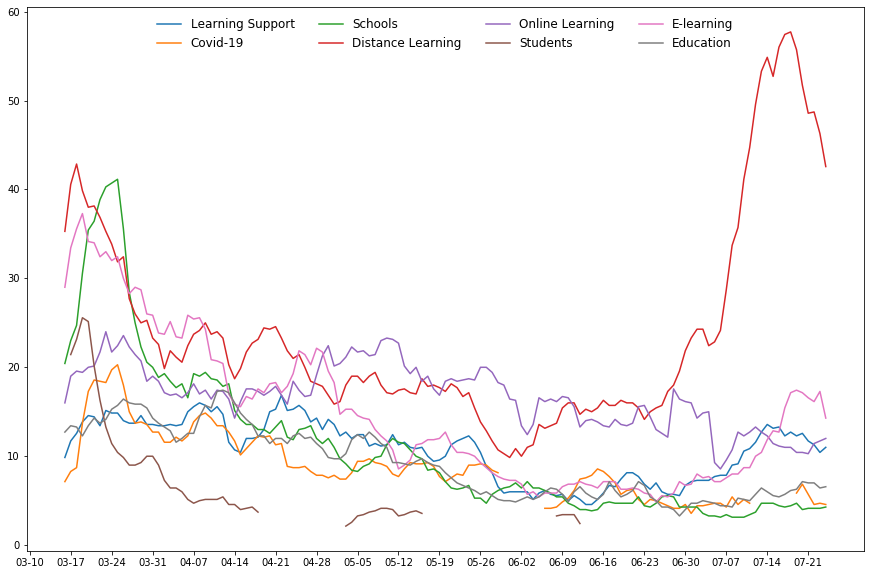

In [60]:
fig, ax = plt.subplots(figsize=(15,10))

#Set ticks for every 7 days
ticks_to_use = pivoted['dates'][::7]

x = pivoted['dates']

topics= pivoted[['Learning Support','Covid-19','Schools','Distance Learning','Online Learning','Students','E-learning','Education']]

y0 = pd.Series(pivoted['Learning Support']).rolling(window=7).mean()
y1 = pd.Series(pivoted['Covid-19']).rolling(window=7).mean()
y2 = pd.Series(pivoted['Schools']).rolling(window=7).mean()
y3 = pd.Series(pivoted['Distance Learning']).rolling(window=7).mean()
y4 = pd.Series(pivoted['Online Learning']).rolling(window=7).mean()
y5 = pd.Series(pivoted['Students']).rolling(window=7).mean()
y6 = pd.Series(pivoted['E-learning']).rolling(window=7).mean()
y7 = pd.Series(pivoted['Education']).rolling(window=7).mean()

p1=plt.plot(x, y0)
p2=plt.plot(x, y1)
p3=plt.plot(x, y2)
p4=plt.plot(x, y3)
p5=plt.plot(x, y4)
p6=plt.plot(x, y5)
p7=plt.plot(x, y6)
p8=plt.plot(x, y7)

plt.legend((p1[0], p2[0], p3[0], p4[0],  p5[0],  p6[0],  p7[0],  p8[0]),('Learning Support','Covid-19','Schools','Distance Learning','Online Learning','Students','E-learning','Education'),fontsize=12, ncol=4, framealpha=0, fancybox=True, loc='upper center')

# Set format of labels (note year not excluded as requested)
labels = [ i.strftime("%m-%d") for i in ticks_to_use ]

# Now set the ticks and labels
ax.set_xticks(ticks_to_use)
ax.set_xticklabels(labels)

plt.show()


In [87]:
#df.to_excel("for_emotion.xlsx") 

In [33]:
# # Preparing a corpus for analysis and checking first 10 entries

corpus=[]
a=[]
for i in range(len(df['clean_tweets'])):
    a=df['clean_tweets'][i]
    corpus.append(a)
        
print(corpus[0:10])



['guess what? thanks covid-19 undeveloped countries catching developed countries. eg working home, virtual schooling, distance learning, holding meetings online teaching, innovations etc. good came corona virus you?', 'regular course ke liye enroll kiya tha, distance learning banke reh gaya. :/ corona lifepositivecoronanegative memes', "trying protect fun last week school g11s distance learning. today 'guess teacher' baby photo 'what expression that?' behind face mask... developing new interpersonal skill post corona world? ../b8yzuukshe", 'bas mat pucho.... mera haal️ working working...damn folks productive before. corona ne watt laga di...honestly due wfh lost work/life balance. plus kids home distance learning progress. shud plain though..', 'online transition coz corona pandemic considered “distance learning”', 'mbbs course division due corona like 3.5 yr + 1 yr ( dlp) + 1 yr internship dlp distance learning program akka lockdown apna medtwitter', 'mention, course, federal minister

In [34]:
import os
import gensim
from gensim import corpora, models, similarities
import logging
import tempfile
from nltk.corpus import stopwords
from string import punctuation
from collections import OrderedDict
import seaborn as sns
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

# init_notebook_mode(connected=True) #do not miss this line

C:\Users\Ngoc\Anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [35]:
# removing common words and tokenizing
list1 = ['RT','rt']
stoplist = stopwords.words('english') + list(punctuation) + list1

texts = [[word for word in str(document).lower().split() if word not in stoplist] for document in corpus]

dictionary = corpora.Dictionary(texts)

# print(dictionary)
# print(dictionary.token2id)



In [36]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [37]:
tfidf = models.TfidfModel(corpus) # step 1 -- initialize a model

In [38]:
corpus_tfidf = tfidf[corpus]  # step 2 -- use the model to transform vectors

In [39]:
total_topics = 2

lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

#Show first n important word in the topics:
lda.show_topics(total_topics,10)

[(0,
  '0.046*"online" + 0.044*"learning" + 0.026*"covid-19" + 0.018*"…" + 0.010*"students" + 0.009*"covid" + 0.007*"school" + 0.007*"education" + 0.006*"schools" + 0.006*"learning."'),
 (1,
  '0.025*"online" + 0.020*"covid-19" + 0.019*"learning" + 0.015*"e-learning" + 0.013*"…" + 0.006*"covid" + 0.006*"free" + 0.006*"covid-19:" + 0.004*"via" + 0.004*"distance"')]

In [57]:
total_topics = 3

lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

#Show first n important word in the topics:
lda.show_topics(total_topics,10)

[(0,
  '0.039*"online" + 0.029*"learning" + 0.029*"covid-19" + 0.018*"…" + 0.009*"e-learning" + 0.008*"education" + 0.007*"pandemic" + 0.006*"free" + 0.005*"covid" + 0.004*"distance"'),
 (1,
  '0.032*"online" + 0.031*"learning" + 0.015*"covid" + 0.014*"covid-19" + 0.009*"…" + 0.007*"e-learning" + 0.006*"students" + 0.005*"school" + 0.005*"learning." + 0.005*"kids"'),
 (2,
  '0.046*"online" + 0.044*"learning" + 0.031*"covid-19" + 0.023*"…" + 0.013*"students" + 0.008*"school" + 0.008*"schools" + 0.006*"covid-19." + 0.006*"education" + 0.006*"resources"')]

In [52]:
# total_topics = 4

# lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
# corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

# #Show first n important word in the topics:
# lda.show_topics(total_topics,10)

[(0,
  '0.047*"online" + 0.034*"learning" + 0.018*"covid" + 0.011*"covid-19" + 0.011*"…" + 0.009*"schools" + 0.009*"learning." + 0.009*"school" + 0.006*"students" + 0.005*"kids"'),
 (1,
  '0.036*"online" + 0.032*"learning" + 0.024*"covid-19" + 0.013*"…" + 0.010*"students" + 0.008*"e-learning" + 0.006*"education" + 0.006*"covid-19." + 0.005*"distance" + 0.005*"covid"'),
 (2,
  '0.051*"learning" + 0.049*"online" + 0.044*"covid-19" + 0.026*"…" + 0.011*"students" + 0.007*"school" + 0.007*"pandemic" + 0.007*"free" + 0.006*"due" + 0.006*"covid-19:"'),
 (3,
  '0.017*"…" + 0.014*"e-learning" + 0.014*"covid-19" + 0.013*"learning" + 0.010*"online" + 0.007*"covid_19" + 0.005*"distance" + 0.005*"education" + 0.004*"de" + 0.004*"covid-19,"')]

In [53]:
# total_topics = 5

# lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
# corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

# #Show first n important word in the topics:
# lda.show_topics(total_topics,10)

In [58]:
data_lda = {i: OrderedDict(lda.show_topic(i,10)) for i in range(total_topics)}
data_lda

{0: OrderedDict([('online', 0.038623493),
              ('learning', 0.029440321),
              ('covid-19', 0.028573167),
              ('…', 0.017845068),
              ('e-learning', 0.009245393),
              ('education', 0.007992102),
              ('pandemic', 0.0070365425),
              ('free', 0.005597034),
              ('covid', 0.0048011965),
              ('distance', 0.003699695)]),
 1: OrderedDict([('online', 0.032475885),
              ('learning', 0.030663565),
              ('covid', 0.015136331),
              ('covid-19', 0.013765951),
              ('…', 0.008983511),
              ('e-learning', 0.007491083),
              ('students', 0.00577639),
              ('school', 0.005475454),
              ('learning.', 0.0051299855),
              ('kids', 0.004613861)]),
 2: OrderedDict([('online', 0.045917846),
              ('learning', 0.04441752),
              ('covid-19', 0.031329233),
              ('…', 0.023328274),
              ('students', 0.013020087)

In [59]:
df_lda = pd.DataFrame(data_lda)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)

(3, 17)


In [60]:
df_lda

online  learning  covid-19         …  e-learning  education  pandemic  \
0  0.038623  0.029440  0.028573  0.017845    0.009245   0.007992  0.007037   
1  0.032476  0.030664  0.013766  0.008984    0.007491   0.000000  0.000000   
2  0.045918  0.044418  0.031329  0.023328    0.000000   0.005729  0.000000   

       free     covid  distance  students    school  learning.      kids  \
0  0.005597  0.004801    0.0037  0.000000  0.000000    0.00000  0.000000   
1  0.000000  0.015136    0.0000  0.005776  0.005475    0.00513  0.004614   
2  0.000000  0.000000    0.0000  0.013020  0.008348    0.00000  0.000000   

    schools  covid-19.  resources  
0  0.000000   0.000000   0.000000  
1  0.000000   0.000000   0.000000  
2  0.007569   0.005961   0.005589

In [61]:
try_lda=df_lda.T

In [62]:
try_lda

0         1         2
online      0.038623  0.032476  0.045918
learning    0.029440  0.030664  0.044418
covid-19    0.028573  0.013766  0.031329
…           0.017845  0.008984  0.023328
e-learning  0.009245  0.007491  0.000000
education   0.007992  0.000000  0.005729
pandemic    0.007037  0.000000  0.000000
free        0.005597  0.000000  0.000000
covid       0.004801  0.015136  0.000000
distance    0.003700  0.000000  0.000000
students    0.000000  0.005776  0.013020
school      0.000000  0.005475  0.008348
learning.   0.000000  0.005130  0.000000
kids        0.000000  0.004614  0.000000
schools     0.000000  0.000000  0.007569
covid-19.   0.000000  0.000000  0.005961
resources   0.000000  0.000000  0.005589

In [63]:
from scipy.cluster.hierarchy import dendrogram, linkage

# # Calculate the distance between each sample
# Z = scipy.cluster.hierarchy.linkage(try_lda, 'ward')
 
# # Plot with Custom leaves
# scipy.cluster.hierarchy.dendrogram(Z, leaf_rotation=0, orientation="left", color_threshold=240, above_threshold_color='grey', labels=try_lda.index)


In [64]:
from scipy.cluster import hierarchy
# Calculate the distance between each sample
Z = linkage(try_lda, 'ward')

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [20.0, 20.0, 42.5, 42.5],
  [85.0, 85.0, 95.0, 95.0],
  [105.0, 105.0, 115.0, 115.0],
  [90.0, 90.0, 110.0, 110.0],
  [75.0, 75.0, 100.0, 100.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [125.0, 125.0, 142.5, 142.5],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [195.0, 195.0, 212.5, 212.5],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [235.0, 235.0, 252.5, 252.5],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [285.0, 285.0, 302.5, 302.5],
  [275.0, 275.0, 293.75, 293.75],
  [243.75, 243.75, 284.375, 284.375],
  [203.75, 203.75, 264.0625, 264.0625],
  [172.5, 172.5, 233.90625, 233.90625],
  [133.75, 133.75, 203.203125, 203.203125],
  [87.5, 87.5, 168.4765625, 168.4765625],
  [65.0, 65.0, 127.98828125, 127.98828125],
  [31.25, 31.25, 96.49414062

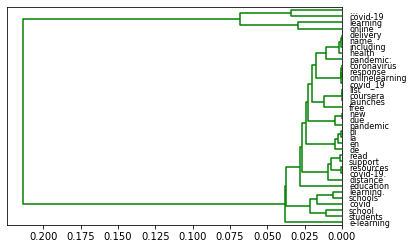

In [56]:
# # Plot with Custom leaves
dendrogram(Z, leaf_rotation=0, orientation="left", color_threshold=240, above_threshold_color='grey', labels=try_lda.index)

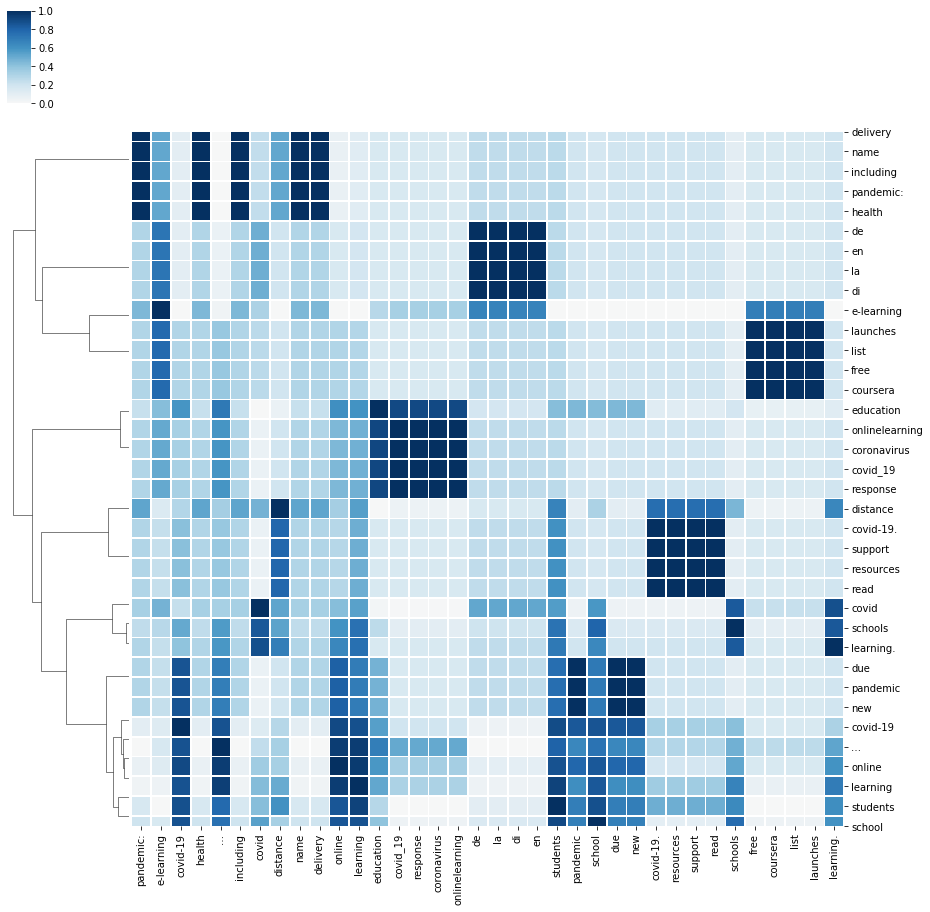

In [52]:
g=sns.clustermap(df_lda.corr(), center=0, standard_scale=1, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(15, 15), col_cluster=False)
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

plt.show()
#plt.setp(ax_heatmap.get_yticklabels(), rotation=0)  # For y axis

In [58]:
# pyLDAvis.enable_notebook()
# panel = pyLDAvis.gensim.prepare(lda, corpus_lda, dictionary, mds='tsne')
# panel

PreparedData(topic_coordinates=               x           y  topics  cluster       Freq
topic                                                   
0     -11.261130 -167.317245       1        1  40.597828
1      -5.649553 -249.519089       2        1  33.312000
3     -93.462852 -172.929169       3        1  13.455679
2     -87.851212 -255.130875       4        1  12.634500, topic_info=     Category        Freq         Term       Total  loglift  logprob
5     Default  273.000000     covid-19  273.000000  30.0000  30.0000
34    Default  447.000000     learning  447.000000  29.0000  29.0000
17    Default  527.000000       online  527.000000  28.0000  28.0000
199   Default  198.000000            …  198.000000  27.0000  27.0000
1164  Default   90.000000   e-learning   90.000000  26.0000  26.0000
...       ...         ...          ...         ...      ...      ...
273    Topic4    3.985668     children   18.495703   0.5339  -6.0720
494    Topic4    4.071814  coronavirus   22.824066   0.3450  -6.0506
1085   Topic4    4.339182    covid-19.   49.508900  -0.3657  -5.9870
53     Topic4    4.273468    learning.   67.269547  -0.6875  -6.0022
883    Topic4    4.026346        covid  133.268509  -1.4308  -6.0618

[328 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
7707      2  0.883924  (covid-19)
1096      1  0.940351          19
1096      3  0.044779          19
5895      4  0.924895         7th
473       1  0.101393      access
...     ...       ...         ...
199       2  0.302708           …
199       3  0.156399           …
199       4  0.232076           …
2599      1  0.430021           ️
2599      3  0.645031           ️

[429 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 3])